# 11. 金融和經濟數據應用

In [1]:
%pylab inline
from pandas import Series, DataFrame
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## 數據規整化方面的話題

### 時間序列以及截面對齊全

自動對齊的功能

In [42]:
# 成交價
prices = pd.read_csv('D:\\a 電腦類書籍 CD\\Python\\python for data analysis\\pydata-book\\ch11\\stock_px.csv',
                   parse_dates = True, 
                   index_col = 0)
prices['2011/9/6':][:5]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2011-09-06,11.77,379.74,15.11,165.11,64.64,25.51,62.45,1165.24,71.15
2011-09-07,12.25,383.93,15.65,167.31,65.43,26.00,61.62,1198.62,73.65
2011-09-08,12.03,384.14,15.44,165.25,64.95,26.22,61.34,1185.90,72.82
2011-09-09,11.58,377.48,14.95,161.37,63.64,25.74,59.99,1154.23,71.01
2011-09-12,11.55,379.94,14.87,162.42,63.59,25.89,60.14,1162.27,71.84


In [63]:
# 篩選與尋找特定值
prices[prices == 17.32].dropna(how = 'all')

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-05,NaN,NaN,NaN,17.32,NaN,NaN,NaN,NaN,NaN
2002-10-08,NaN,NaN,17.32,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# 篩選與尋找特定值
prices.ix[(prices == 17.32).any(axis = 1)]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
2002-10-08,15.39,6.84,17.32,50.47,46.41,17.68,33.58,798.55,26.76


In [21]:
# 交易量
volume = pd.read_csv('D:\\a 電腦類書籍 CD\\Python\\python for data analysis\\pydata-book\\ch11\\volume.csv',
                   parse_dates = True, 
                   index_col = 0)
volume['2011/9/6':][:5]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2011-09-06,23960600,18173500,97466600,5761200,15848300,54929300,8216000,5103980000,25416300
2011-09-07,16645700,12492000,60239400,6796600,10759700,41961000,14915300,4441040000,23108400
2011-09-08,15735500,14839800,117920800,6027200,15551500,65811900,11827200,4465170000,22434800
2011-09-09,24972700,20171900,144441000,6743900,17008200,64529200,14838300,4586370000,27969100
2011-09-12,28990500,16697300,169797200,5247200,13448200,55046100,11253500,5168550000,26205800


In [22]:
# 交易金額
# 會自動對齊
# 自動排除缺失數據
amount = (prices * volume)
amount['2011/9/6':][:5]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2011-09-06,282016262,6901204890,1472720326,951231732,1024434112,1401246443,513089200,5.947362e+12,1808369745
2011-09-07,203909825,4796053560,942746610,1137139146,704007171,1090986000,919080786,5.323119e+12,1701933660
2011-09-08,189298065,5700560772,1820697152,995994800,1010069925,1725588018,725480448,5.295245e+12,1633702136
2011-09-09,289183866,7614488812,2159392950,1088263143,1082401848,1660981608,890149617,5.293726e+12,1986085791
2011-09-12,334840275,6343972162,2524884364,852250224,855171038,1425143529,676785490,6.007251e+12,1882624672


In [23]:
# 成交量加權平均價格
vwap = amount.sum() / volume.sum()
vwap

AA        17.084474
AAPL      81.246271
GE        18.205646
IBM       61.333701
JNJ       40.576111
MSFT      16.923765
PEP       38.953033
SPX     1134.418556
XOM       50.520303
dtype: float64

In [24]:
# align 手工對齊
prices.align(volume, join = 'inner')

(               AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM
 1990-02-01   4.98    7.86   2.87   16.79   4.27   0.51   6.04   328.79   6.12
 1990-02-02   5.04    8.00   2.87   16.89   4.37   0.51   6.09   330.92   6.24
 1990-02-05   5.07    8.18   2.87   17.32   4.34   0.51   6.05   331.85   6.25
 1990-02-06   5.01    8.12   2.88   17.56   4.32   0.51   6.15   329.66   6.23
 1990-02-07   5.04    7.77   2.91   17.93   4.38   0.51   6.17   333.75   6.33
 1990-02-08   5.04    7.71   2.92   17.86   4.46   0.51   6.22   332.96   6.35
 1990-02-09   5.06    8.00   2.94   17.82   4.49   0.52   6.24   333.62   6.37
 1990-02-12   4.96    7.94   2.89   17.58   4.46   0.52   6.23   330.08   6.22
 1990-02-13   4.91    8.06   2.88   17.95   4.43   0.52   6.09   331.02   6.23
 1990-02-14   4.94    8.00   2.89   18.04   4.47   0.52   6.10   332.01   6.20
 1990-02-15   4.99    8.00   2.91   18.04   4.54   0.53   6.15   334.89   6.40
 1990-02-16   5.10    7.91   2.88   17.99   4.47   0

### 頻率不同的時間序列的運算
- resample() 用於將數據轉換到 固定頻率
- reindex() 用於使數據符合一個新的索引

In [25]:
ts1 = Series(np.random.randn(3), 
             index = pd.date_range('2012/6/13', freq = 'W-WED', periods = 3))
ts1

2012-06-13    0.898343
2012-06-20    0.050039
2012-06-27    1.499072
Freq: W-WED, dtype: float64

In [26]:
# resample
# 轉換頻率為 B
ts1.resample('B')

2012-06-13    0.898343
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20    0.050039
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27    1.499072
Freq: B, dtype: float64

In [27]:
# resample
#  fill_method = 'ffill' : 填充插值
ts1.resample('B', fill_method = 'ffill')

2012-06-13    0.898343
2012-06-14    0.898343
2012-06-15    0.898343
2012-06-18    0.898343
2012-06-19    0.898343
2012-06-20    0.050039
2012-06-21    0.050039
2012-06-22    0.050039
2012-06-25    0.050039
2012-06-26    0.050039
2012-06-27    1.499072
Freq: B, dtype: float64

In [28]:
ts2 = Series(np.random.randn(6), 
             index = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18', '2012-6-21', '2012-6-22', '2012-6-29'])            )
ts2

2012-06-12   -0.073460
2012-06-17   -1.051370
2012-06-18    0.927697
2012-06-21    1.149854
2012-06-22    0.547968
2012-06-29    0.419803
dtype: float64

In [29]:
ts1

2012-06-13    0.898343
2012-06-20    0.050039
2012-06-27    1.499072
Freq: W-WED, dtype: float64

In [30]:
ts1 + ts2
# 因為索引沒有辦法對其，所以相加之後都是 NaN

2012-06-12   NaN
2012-06-13   NaN
2012-06-17   NaN
2012-06-18   NaN
2012-06-20   NaN
2012-06-21   NaN
2012-06-22   NaN
2012-06-27   NaN
2012-06-29   NaN
dtype: float64

#### reindex
依據別的 Series的 index 來做 reindex()，讓兩者的索引對齊

In [31]:
# 依據別的 Series的 index 來做 reindex()，讓兩者的索引對齊
# 新的索引完全依照 ts2.index，若 ts1中沒有相對的索引，則新的 Series中不會有相對的元素(會被捨去，標示成 NaN)
# 使用 method = 'ffill'，插值
ts1.reindex(ts2.index, method = 'ffill')

2012-06-12         NaN
2012-06-17    0.898343
2012-06-18    0.898343
2012-06-21    0.050039
2012-06-22    0.050039
2012-06-29    1.499072
dtype: float64

In [32]:
# 索引經過 reindex 對齊之後，做算術運算才不會都是 NaN
ts2 + ts1.reindex(ts2.index, method = 'ffill')

2012-06-12         NaN
2012-06-17   -0.153026
2012-06-18    1.826040
2012-06-21    1.199893
2012-06-22    0.598007
2012-06-29    1.918875
dtype: float64

#### 使用Period

In [33]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46], 
             index = pd.period_range('1984Q2', freq = 'Q-SEP', periods = 7))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [35]:
infl = Series([0.025, 0.045, 0.037, 0.04], 
             index = pd.period_range('1982', freq = 'A-DEC', periods = 4))
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [67]:
# PeriodIndex的序列，必須經過顯式的頻率轉換，才可以做進一步的相互運算
infl_q = infl.asfreq('Q-SEP', how = 'end')
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [69]:
# reindex
# 索引對齊，運算之後才不會出現 NaN
infl_q.reindex(gdp.index, method = 'ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

In [71]:
infl_q.reindex(gdp.index, method = 'ffill') + gdp

1984Q2    1.825
1984Q3    1.985
1984Q4    2.125
1985Q1    2.047
1985Q2    2.187
1985Q3    2.347
1985Q4    2.497
Freq: Q-SEP, dtype: float64

### 時間和 最當前 數據選取

In [73]:
# 場景: 希望從每天股市資訊中，固定抓取特定時間的資料，但是資料不會剛好落在特定的時間點上
rng = pd.date_range('2012-6-1 9:30', '2012-6-1 15:59', freq = 'T')
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(4)])

In [75]:
ts = Series(np.random.randn(len(rng)), 
            index = rng)
ts

2012-06-01 09:30:00   -1.329041
2012-06-01 09:31:00   -0.001579
2012-06-01 09:32:00    1.956743
2012-06-01 09:33:00    0.324358
2012-06-01 09:34:00   -0.371320
2012-06-01 09:35:00   -0.931168
2012-06-01 09:36:00    0.245595
2012-06-01 09:37:00   -1.867830
2012-06-01 09:38:00   -0.987621
2012-06-01 09:39:00    0.406680
2012-06-01 09:40:00    0.882902
2012-06-01 09:41:00   -0.195651
2012-06-01 09:42:00   -0.285025
2012-06-01 09:43:00   -0.357536
2012-06-01 09:44:00   -0.651300
2012-06-01 09:45:00   -1.218564
2012-06-01 09:46:00   -0.543692
2012-06-01 09:47:00   -0.205841
2012-06-01 09:48:00    0.520295
2012-06-01 09:49:00    0.042217
2012-06-01 09:50:00   -1.993877
2012-06-01 09:51:00   -0.724797
2012-06-01 09:52:00    0.082250
2012-06-01 09:53:00   -0.426975
2012-06-01 09:54:00    1.473578
2012-06-01 09:55:00    0.863896
2012-06-01 09:56:00   -1.406321
2012-06-01 09:57:00   -0.037482
2012-06-01 09:58:00   -1.578954
2012-06-01 09:59:00   -0.083084
                         ...   
2012-06-

In [79]:
from datetime import time

# 建構 time物件，代表特定時間點
time(10, 0)

datetime.time(10, 0)

In [76]:
# 索引每天 10:00，取額資料
ts[time(10, 0)]

2012-06-01 10:00:00   -1.329581
2012-06-01 10:00:00    1.011309
2012-06-04 10:00:00    0.542934
2012-06-05 10:00:00    1.081277
2012-06-06 10:00:00    1.483233
dtype: float64

In [80]:
# 也可以用 at_time()
ts.at_time(time(10, 0))

2012-06-01 10:00:00   -1.329581
2012-06-01 10:00:00    1.011309
2012-06-04 10:00:00    0.542934
2012-06-05 10:00:00    1.081277
2012-06-06 10:00:00    1.483233
dtype: float64

In [81]:
# 用 between_time() 取得時間區間之內的資料
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00   -1.329581
2012-06-01 10:01:00   -0.165890
2012-06-01 10:00:00    1.011309
2012-06-01 10:01:00    1.073854
2012-06-04 10:00:00    0.542934
2012-06-04 10:01:00    0.896245
2012-06-05 10:00:00    1.081277
2012-06-05 10:01:00   -0.392456
2012-06-06 10:00:00    1.483233
2012-06-06 10:01:00   -1.911407
dtype: float64

In [82]:
# 取得上午10點前 最後出線的數字
# 使用 asof
selection = pd.date_range('2012/6/1 10:00', freq = 'T', periods = 1)
ts.asof(selection)

2012-06-01 10:00:00   -1.329581
Freq: T, dtype: float64

### 拼接多個數據源

In [112]:
# concat: 將兩個數據源物件 合併
data1 = DataFrame(np.ones((6, 3), dtype = np.float64), 
                  columns = list('abc'), 
                  index = pd.date_range('6/12/2012', freq = 'D', periods = 6))
data1

,a,b,c
2012-06-12,1,1,1
2012-06-13,1,1,1
2012-06-14,1,1,1
2012-06-15,1,1,1
2012-06-16,1,1,1
2012-06-17,1,1,1


In [113]:
data2 = DataFrame(np.ones((6, 3), dtype = np.float64), 
                  columns = list('abc'), 
                  index = pd.date_range('6/13/2012', freq = 'D', periods = 6))
data2

,a,b,c
2012-06-13,1,1,1
2012-06-14,1,1,1
2012-06-15,1,1,1
2012-06-16,1,1,1
2012-06-17,1,1,1
2012-06-18,1,1,1


In [114]:
# concat() 可以用來合併兩個 DataFrame
# 兩個 DataFrame的邊界要先切片好
spliced = pd.concat([data1.ix[:'2012/6/14'], data2.ix['2012/6/15':]])
spliced

,a,b,c
2012-06-12,1,1,1
2012-06-13,1,1,1
2012-06-14,1,1,1
2012-06-15,1,1,1
2012-06-16,1,1,1
2012-06-17,1,1,1
2012-06-18,1,1,1


In [115]:
# 用 DataFrame 的 combine_first() 來打補釘
# 會優先使用 spliced 的資料，並且補上 spliced中沒有 但是 data2中有的 row
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c
2012-06-12,1,1,1
2012-06-13,1,1,1
2012-06-14,1,1,1
2012-06-15,1,1,1
2012-06-16,1,1,1
2012-06-17,1,1,1
2012-06-18,1,1,1


In [116]:
# 也可以使用 update()，但是要搭配 overwrite = False
# overwrite = False: 如果 spliced沒有 但是 data2中有，才update到 spliced
# spliced_filled = spliced.update(data2, overwrite = False)
# spliced_filled

In [119]:
# 使用 賦值
spliced_cp = spliced.copy()
spliced_cp[['a', 'c'] = data1[['a', 'c']]
spliced_cp

SyntaxError: invalid syntax (<ipython-input-119-c834f0253f8a>, line 3)

## 分組變換和分析

In [227]:
# 1000個虛擬的股票代碼

import string
import collections

N = 1000

def rands(n):
    choices = list(string.ascii_uppercase)
    return ''.join([random.choice(choices) for _ in range(n)])
 
tickers = sorted({rands(5) for _ in range(N)})
tickers[:5]

['AADDE', 'AAHXH', 'ABSYI', 'ACTYT', 'AEHZL']

In [228]:
# 投資組合

M = 500

data = {'Momentum': np.random.randn(M) / 200 + 0.03, 
        'Value': np.random.randn(M) / 200 + 0.08, 
        'ShortInterest': np.random.randn(M) / 200 - 0.02}
df = DataFrame(data, 
               index = tickers[:M])
df[:5]

,Momentum,ShortInterest,Value
AADDE,0.026240,-0.025277,0.080668
AAHXH,0.024219,-0.022713,0.080734
ABSYI,0.023436,-0.023050,0.079946
ACTYT,0.033403,-0.018511,0.086488
AEHZL,0.039476,-0.020010,0.081279


In [229]:
# 行業分類
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), len(tickers))
industries = Series(ind_names.take(sampler), 
                    index = tickers, 
                    name = 'Industry')
industries[:5]

AADDE    FINANCIAL
AAHXH         TECH
ABSYI    FINANCIAL
ACTYT         TECH
AEHZL    FINANCIAL
Name: Industry, dtype: object

In [242]:
# 加上 行業別 列
if 'Industry' not in df.columns : 
    df = df.join(industries)
df[:5]

,Momentum,ShortInterest,Value,Industry
AADDE,0.026240,-0.025277,0.080668,FINANCIAL
AAHXH,0.024219,-0.022713,0.080734,TECH
ABSYI,0.023436,-0.023050,0.079946,FINANCIAL
ACTYT,0.033403,-0.018511,0.086488,TECH
AEHZL,0.039476,-0.020010,0.081279,FINANCIAL


In [243]:
# 分組
grouped = df.groupby('Industry')
grouped

In [244]:
grouped.mean()

,Momentum,ShortInterest,Value
Industry,,,
FINANCIAL,0.030191,-0.019777,0.080306
TECH,0.030264,-0.019444,0.080208


In [245]:
grouped.describe()

Momentum  ShortInterest       Value
Industry                                              
FINANCIAL count  260.000000     260.000000  260.000000
          mean     0.030191      -0.019777    0.080306
          std      0.005386       0.004773    0.004963
          min      0.014526      -0.034631    0.060752
          25%      0.026413      -0.022923    0.076904
          50%      0.030294      -0.020013    0.079946
          75%      0.033654      -0.016672    0.083546
          max      0.045018      -0.004879    0.093513
TECH      count  240.000000     240.000000  240.000000
          mean     0.030264      -0.019444    0.080208
          std      0.005562       0.004697    0.004713
          min      0.015629      -0.032768    0.065862
          25%      0.026758      -0.022539    0.076870
          50%      0.030307      -0.019142    0.080204
          75%      0.033904      -0.016561    0.083235
          max      0.048466      -0.006557    0.092339

In [250]:
# 自定義的變換函數
# 行業內的標準化處理
def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = grouped.apply(zscore).drop('Industry', axis = 1)
df_stand[:5]

D:\Python\lib\site-packages\pandas\core\ops.py:929: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 260
  yrav = yrav[mask]
D:\Python\lib\site-packages\pandas\core\ops.py:929: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 240
  yrav = yrav[mask]


,Momentum,ShortInterest,Value
AADDE,-0.733681,-1.152417,0.072955
AAHXH,-1.086813,-0.695938,0.111537
ABSYI,-1.254318,-0.685709,-0.072615
ACTYT,0.564345,0.198830,1.332432
AEHZL,1.724045,-0.048947,0.195983


In [252]:
grouped.rank()[:5]

,Momentum,ShortInterest,Value,Industry
AADDE,63,30,140,130.5
AAHXH,31,54,135,120.5
ABSYI,30,62,130,130.5
ACTYT,175,135,217,120.5
AEHZL,251,131,151,130.5


In [253]:
# aggregate()，施用多種函數
grouped.agg(['mean', 'std'])[:5]

Momentum           ShortInterest               Value          
               mean       std          mean       std      mean       std
Industry                                                                 
FINANCIAL  0.030191  0.005386     -0.019777  0.004773  0.080306  0.004963
TECH       0.030264  0.005562     -0.019444  0.004697  0.080208  0.004713

In [255]:
# 排名和標準化 是常見的變換運算組合
grouped.apply(lambda x: zscore(x.rank()))[:5]

,Momentum,ShortInterest,Value,Industry
AADDE,-0.897610,-1.336441,0.126330,NaN
AAHXH,-1.289138,-0.957851,0.208855,NaN
ABSYI,-1.336441,-0.910907,-0.006649,NaN
ACTYT,0.785006,0.208855,1.389965,NaN
AEHZL,1.602399,0.006649,0.272607,NaN


### 分組因子暴露

因子分析(factor analysis)

In [269]:
tickers = np.array(tickers)
tickers[:5]

array(['AADDE', 'AAHXH', 'ABSYI', 'ACTYT', 'AEHZL'], dtype=object)

In [270]:
# 隨機的 三個因子
fac1, fac2, fac3 = np.random.rand(3, 1000) 

In [267]:
# 隨機取樣，重新排列 rows
ticker_subset = tickers.take(np.random.permutation(len(tickers))[:1000])
ticker_subset[:5]

array(['GMYDM', 'OVESH', 'YTPIV', 'KZMXL', 'JKSGK'], dtype=object)

In [271]:
# 因子加權和以及噪音
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000), 
             index = ticker_subset)
port[:5]

GMYDM   -0.223097
OVESH    0.665662
YTPIV   -0.124344
KZMXL    0.725842
JKSGK    0.142775
dtype: float64

In [273]:
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3}, 
                    index = ticker_subset)
factors[:5]

,f1,f2,f3
GMYDM,0.082828,0.864087,0.072400
OVESH,0.846151,0.498852,0.620566
YTPIV,0.545555,0.691480,0.846516
KZMXL,0.231691,0.250038,0.189698
JKSGK,0.190221,0.416936,0.312392


In [274]:
factors.corrwith(port)

f1    0.449139
f2   -0.709051
f3    0.190009
dtype: float64

In [278]:
# 計算因子暴露，使用pandas.ols
pd.ols(y = port, x = factors).beta

ImportError: No module named 'scikits'

In [279]:
def beta_exposure(chunk, factors = None):
    return pd.ols(y = chunk, x = factors).beta

by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors = factors)

ImportError: No module named 'scikits'

### 十分位和四分位分析

In [336]:
import pandas.io.data as web
data = web.get_data_yahoo('SPY', '2012-01-01', '2013-01-01')
data[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,193697900,118.196252
2012-01-04,127.199997,127.809998,126.709999,127.699997,127186500,118.381655
2012-01-05,127.010002,128.229996,126.430000,128.039993,173895000,118.696842
2012-01-06,128.199997,128.220001,127.290001,127.709999,148050000,118.390928
2012-01-09,128.000000,128.179993,127.410004,128.020004,99530200,118.678312


In [395]:
px = data['Adj Close']
returns = px.pct_change()

def trend_signal(rets, lookback, lag): 
    signal = pd.rolling_sum(rets, lookback, min_periods = lookback -5)
    return signal.shift(lag)

def to_index(rets):
    index = (1 + rets).cumprod()
    index.values[-1] = 1
    return index

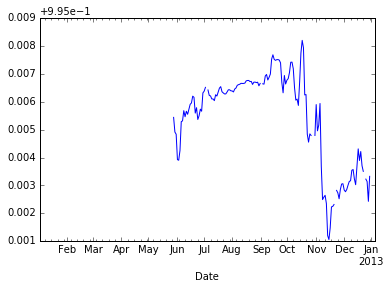

In [396]:
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').resample('B', fill_method = 'ffill')
trade_rets = (trade_friday.shift(1) * returns)
to_index(trade_rets).plot() 

In [403]:
vol = pd.rolling_std(returns, 250, min_periods = 200) * np.sqrt(250)
#vol = vol.dropna()

def sharpe(rets, ann = 250):
    return rets.mean() / rets.std() * np.sqrt(ann)
    #return rets.mean()

trade_rets.groupby(pd.qcut(trade_rets, 4)).agg(sharpe) 

Adj Close
[-0.00225, -0.00011]   -16.845840
(-0.00011, 8.82e-06]   -14.839133
(8.82e-06, 0.000138]    25.052121
(0.000138, 0.00111]     25.431637
Name: Adj Close, dtype: float64

## 更多應用範例

### 信號前沿分析

In [420]:
names = ['AAPL', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = DataFrame({n: get_px(n, '1/1/2013', '6/1/2013') for n in names})

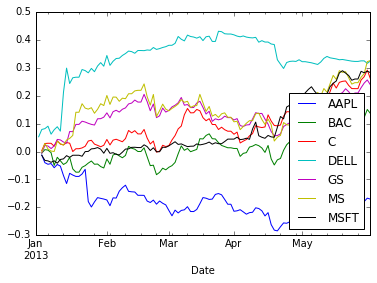

In [421]:
# 計算每支股票的累計收益
px = px.asfreq('B').fillna(method = 'pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()

In [422]:
# 計算特定回顧期的動量，降序排列並標準化
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis = 1, ascending = False)
    demeaned = ranks - ranks.mean(axis = 1)

In [423]:
# 計算投資組合的 夏普比率
compound = lambda x: (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def start_sr(prices, lb, hold):
    # 計算投資組合權重
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag = 1)    
    daily_rets = prices.pct_change()
    
    # 計算投資組合收益
    port = port.shift(1).resample(freq, how = 'first')
    returns = daily_rets.reaample(freq, how = compound)
    port_rets = (port * returns).sum(axis = 1)
    
    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [424]:
start_sr(px, 70, 30) 

AttributeError: 'NoneType' object has no attribute 'shift'